In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from glob import glob
import numpy as np

In [3]:
csv_mean_df=pd.read_pickle('benchmark_2_pdf_kl_mean.pickle')
csv_mean=csv_mean_df.to_csv(index=False)
csv_std_df=pd.read_pickle('benchmark_2_pdf_kl_std.pickle')
csv_std=csv_std_df.to_csv(index=False)

In [5]:
csv_mean_df

,Sampling,Ratio,R2_10,R2_100,R2_1000,R2_0
0,PDF,0.2,0.808121,0.846799,0.846147,0.826149
1,PDF,0.3,0.823276,0.847334,0.846864,0.827866
2,PDF,0.4,0.823551,0.842291,0.847371,0.822299
3,Random,0.2,0.843042,0.845200,0.845009,0.842681
4,Random,0.3,0.841956,0.843199,0.842922,0.840638
5,Random,0.4,0.842918,0.841401,0.842342,0.839011


In [6]:
csv_std_df

,Sampling,Ratio,R2_10,R2_100,R2_1000,R2_0
0,PDF,0.2,0.196954,0.148105,0.147507,0.172341
1,PDF,0.3,0.178270,0.145507,0.146664,0.171782
2,PDF,0.4,0.182506,0.158027,0.146154,0.184113
3,Random,0.2,0.148707,0.148829,0.152591,0.150544
4,Random,0.3,0.155335,0.153037,0.153389,0.154725
5,Random,0.4,0.155217,0.156100,0.154571,0.155134


In [7]:
import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

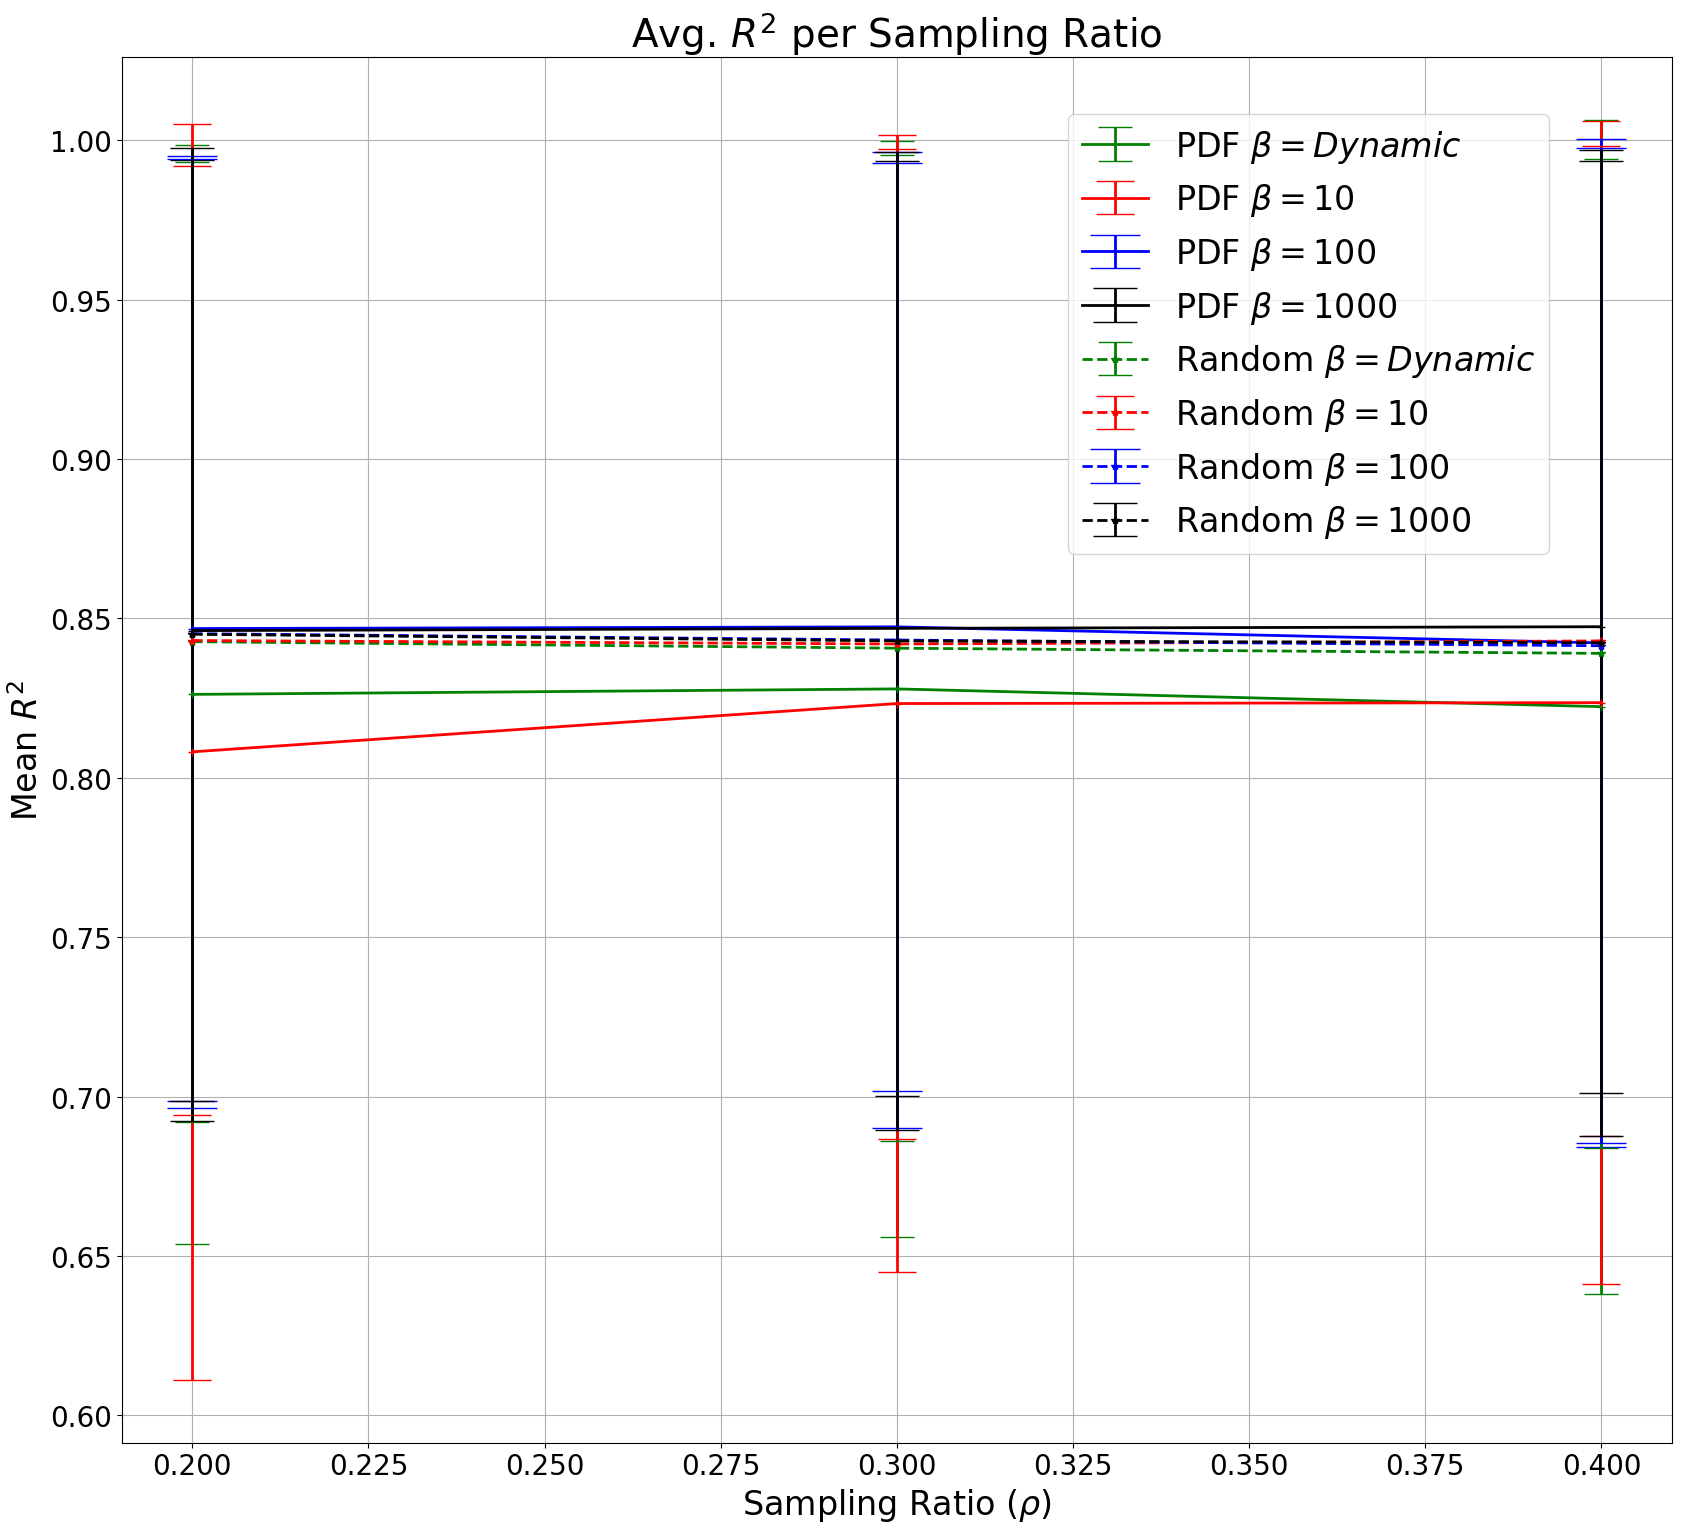

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

# Your CSV data
csv_data_mean = csv_mean

csv_data_std = csv_std

# Load CSV data into pandas DataFrames
data_mean = pd.read_csv(StringIO(csv_data_mean))
data_std = pd.read_csv(StringIO(csv_data_std))

# Separate data for PDF and Random
pdf_data_mean = data_mean[data_mean['Sampling'] == 'PDF']
random_data_mean = data_mean[data_mean['Sampling'] == 'Random']

pdf_data_std = data_std[data_std['Sampling'] == 'PDF']
random_data_std = data_std[data_std['Sampling'] == 'Random']

# Create the plot
plt.figure(figsize=(20, 18))

plt.errorbar(pdf_data_mean['Ratio'], pdf_data_mean['R2_0'], yerr=pdf_data_std['R2_0'], marker='+', label=r'PDF $\beta=Dynamic$', color='green', capsize=12, linewidth=2)
plt.errorbar(pdf_data_mean['Ratio'], pdf_data_mean['R2_10'], yerr=pdf_data_std['R2_10'], marker='+', label=r'PDF $\beta=10$', color='red', capsize=14, linewidth=2)
plt.errorbar(pdf_data_mean['Ratio'], pdf_data_mean['R2_100'], yerr=pdf_data_std['R2_100'], marker='+', label=r'PDF $\beta=100$', color='blue',capsize=18, linewidth=2)
plt.errorbar(pdf_data_mean['Ratio'], pdf_data_mean['R2_1000'], yerr=pdf_data_std['R2_1000'], marker='+', label=r'PDF $\beta=1000$', color='black',capsize=16, linewidth=2)

plt.errorbar(random_data_mean['Ratio'], random_data_mean['R2_0'], yerr=random_data_std['R2_0'], marker='*', linestyle='--', label=r'Random $\beta=Dynamic$',capsize=12, color='green', linewidth=2)
plt.errorbar(random_data_mean['Ratio'], random_data_mean['R2_10'], yerr=random_data_std['R2_10'], marker='*', linestyle='--', label=r'Random $\beta=10$',capsize=14, color='red', linewidth=2)
plt.errorbar(random_data_mean['Ratio'], random_data_mean['R2_100'], yerr=random_data_std['R2_100'], marker='*', linestyle='--', label=r'Random $\beta=100$',capsize=18, color='blue', linewidth=2)
plt.errorbar(random_data_mean['Ratio'], random_data_mean['R2_1000'], yerr=random_data_std['R2_1000'], marker='*', linestyle='--', label=r'Random $\beta=1000$',capsize=16, color='black', linewidth=2)

plt.xlabel(r'Sampling Ratio ($\rho$)', size=24)
plt.ylabel(r'Mean $R^2$', size=24)
plt.title(r'Avg. $R^2$ per Sampling Ratio', size=28)
plt.legend(loc='center left', bbox_to_anchor=(.6, .8), fontsize=24)  # Place legend outside of the plot
plt.grid()


plt.savefig('fig_rho_comparison.jpg')
plt.show()


## Note that shaded region is removed from paper for readability 

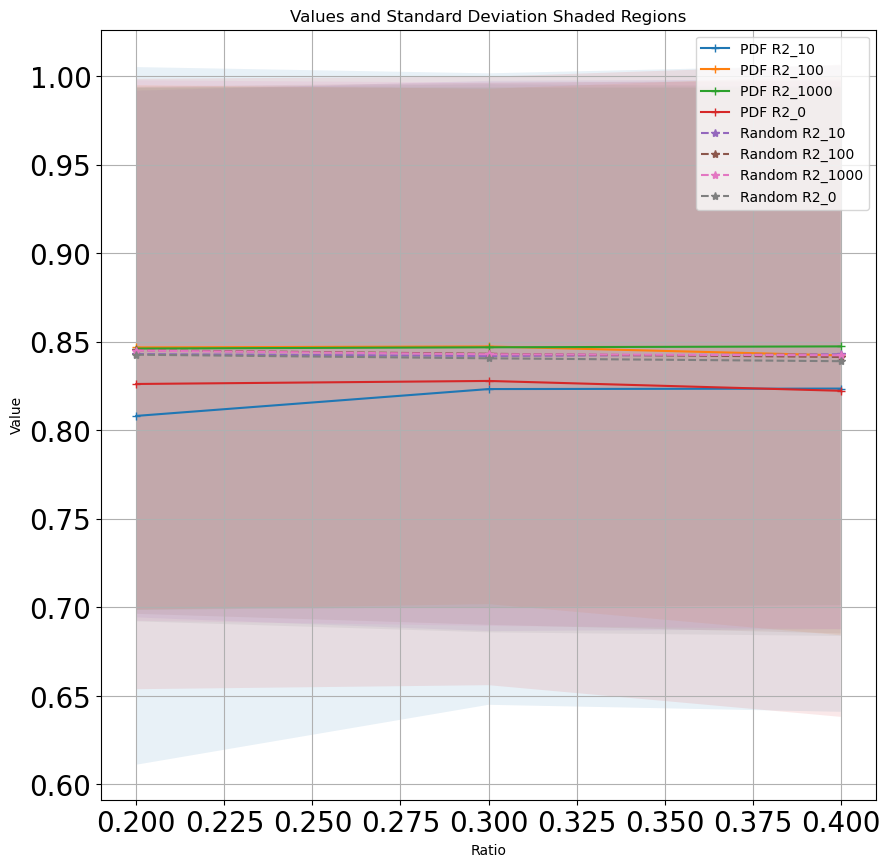

In [9]:
# Load CSV data into pandas DataFrames
data_mean = pd.read_csv(StringIO(csv_data_mean))
data_std = pd.read_csv(StringIO(csv_data_std))

# Separate data for PDF and Random
pdf_data_mean = data_mean[data_mean['Sampling'] == 'PDF']
random_data_mean = data_mean[data_mean['Sampling'] == 'Random']

pdf_data_std = data_std[data_std['Sampling'] == 'PDF']
random_data_std = data_std[data_std['Sampling'] == 'Random']

# Create the plot
plt.figure(figsize=(10, 10))

plt.plot(pdf_data_mean['Ratio'], pdf_data_mean['R2_10'], marker='+', label='PDF R2_10')
plt.fill_between(pdf_data_mean['Ratio'], pdf_data_mean['R2_10'] - pdf_data_std['R2_10'], pdf_data_mean['R2_10'] + pdf_data_std['R2_10'], alpha=0.1)

plt.plot(pdf_data_mean['Ratio'], pdf_data_mean['R2_100'], marker='+', label='PDF R2_100')
plt.fill_between(pdf_data_mean['Ratio'], pdf_data_mean['R2_100'] - pdf_data_std['R2_100'], pdf_data_mean['R2_100'] + pdf_data_std['R2_100'], alpha=0.1)

plt.plot(pdf_data_mean['Ratio'], pdf_data_mean['R2_1000'], marker='+', label='PDF R2_1000')
plt.fill_between(pdf_data_mean['Ratio'], pdf_data_mean['R2_1000'] - pdf_data_std['R2_1000'], pdf_data_mean['R2_1000'] + pdf_data_std['R2_1000'], alpha=0.1)

plt.plot(pdf_data_mean['Ratio'], pdf_data_mean['R2_0'], marker='+', label='PDF R2_0')
plt.fill_between(pdf_data_mean['Ratio'], pdf_data_mean['R2_0'] - pdf_data_std['R2_0'], pdf_data_mean['R2_0'] + pdf_data_std['R2_0'], alpha=0.1)

plt.plot(random_data_mean['Ratio'], random_data_mean['R2_10'], marker='*', linestyle='--', label='Random R2_10')
plt.fill_between(random_data_mean['Ratio'], random_data_mean['R2_10'] - random_data_std['R2_10'], random_data_mean['R2_10'] + random_data_std['R2_10'], alpha=0.1)

plt.plot(random_data_mean['Ratio'], random_data_mean['R2_100'], marker='*', linestyle='--', label='Random R2_100')
plt.fill_between(random_data_mean['Ratio'], random_data_mean['R2_100'] - random_data_std['R2_100'], random_data_mean['R2_100'] + random_data_std['R2_100'], alpha=0.1)

plt.plot(random_data_mean['Ratio'], random_data_mean['R2_1000'], marker='*', linestyle='--', label='Random R2_1000')
plt.fill_between(random_data_mean['Ratio'], random_data_mean['R2_1000'] - random_data_std['R2_1000'], random_data_mean['R2_1000'] + random_data_std['R2_1000'], alpha=0.1)

plt.plot(random_data_mean['Ratio'], random_data_mean['R2_0'], marker='*', linestyle='--', label='Random R2_0')
plt.fill_between(random_data_mean['Ratio'], random_data_mean['R2_0'] - random_data_std['R2_0'], random_data_mean['R2_0'] + random_data_std['R2_0'], alpha=0.1)

plt.xlabel('Ratio')
plt.ylabel('Value')
plt.title('Values and Standard Deviation Shaded Regions')
plt.legend()
plt.grid()

plt.show()